# goals
- analyse and get acquainted with the data 
- graph and visualize year to year values of rising sea level
- make a regression model describing what will happen in 2050


data from freecodecamp.com

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np 

In [3]:
df = pd.read_csv('sealevel.csv')
df.head()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN


In [4]:
df.describe()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
count,134.000000,134.000000,134.000000,134.000000,21.000000
mean,1946.500000,3.650341,3.204666,4.096016,7.363746
std,38.826537,2.485692,2.663781,2.312581,0.691038
min,1880.000000,-0.440945,-1.346457,0.464567,6.297493
25%,1913.250000,1.632874,1.078740,2.240157,6.848690
50%,1946.500000,3.312992,2.915354,3.710630,7.488353
75%,1979.750000,5.587598,5.329724,5.845472,7.907365
max,2013.000000,9.326772,8.992126,9.661417,8.546648


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      134 non-null    int64  
 1   CSIRO Adjusted Sea Level  134 non-null    float64
 2   Lower Error Bound         134 non-null    float64
 3   Upper Error Bound         134 non-null    float64
 4   NOAA Adjusted Sea Level   21 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 5.4 KB


In [7]:
df.isnull().sum()

Year                          0
CSIRO Adjusted Sea Level      0
Lower Error Bound             0
Upper Error Bound             0
NOAA Adjusted Sea Level     113
dtype: int64

<AxesSubplot:>

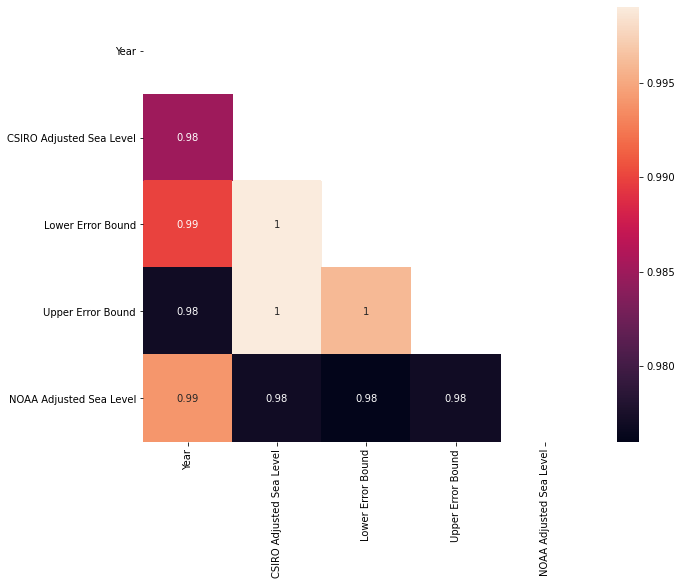

In [10]:
plt.figure(figsize=(10,8))
matrix = df.corr()
matrix = matrix.round(decimals = 3)
mask = np.zeros_like(matrix)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(matrix, annot= True, mask = mask)


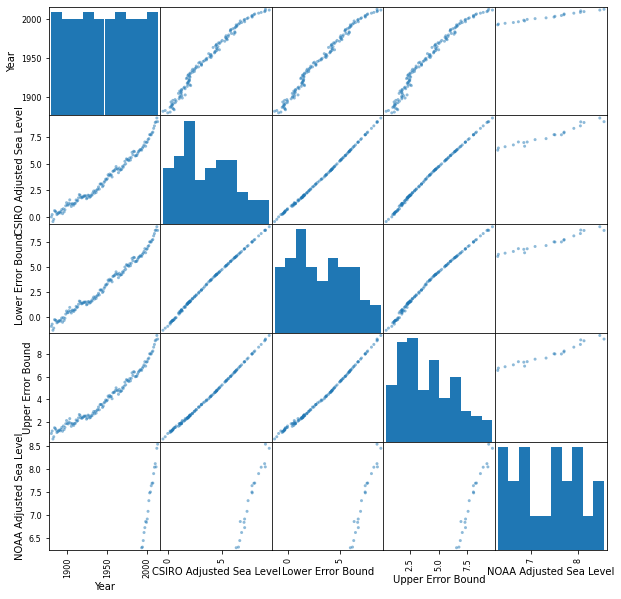

In [9]:
from pandas.plotting import scatter_matrix
sm = scatter_matrix(df, figsize=(10, 10))

Text(0.5, 0.98, 'CSIRO and NOAA Year by Year Growth')

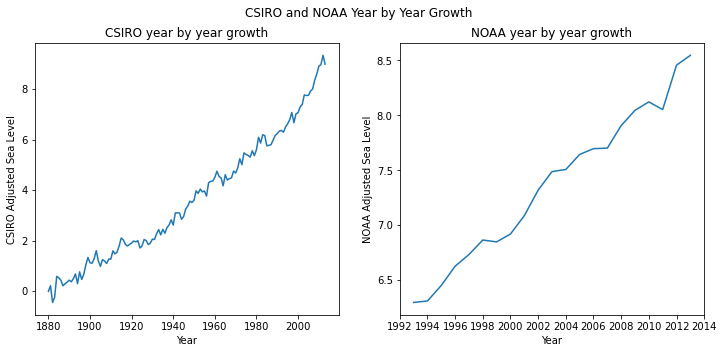

In [62]:
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.lineplot(y = 'CSIRO Adjusted Sea Level',x = 'Year', data = df)
plt.title('CSIRO year by year growth')

plt.subplot(122)
sns.lineplot(y = 'NOAA Adjusted Sea Level',x = 'Year', data = df)
plt.xticks(range(1992,2015,2))
plt.title('NOAA year by year growth')

plt.suptitle('CSIRO and NOAA Year by Year Growth')

## Regression Model
Making linear regression model based on CSIRO and NOAA year by year growth

In [51]:
from scipy import stats
res = stats.linregress(df['Year'], df['CSIRO Adjusted Sea Level'])
print(f"R-squared of CSIRO: {res.rvalue**2:.6f}")

newdf = df.dropna()
noaa = stats.linregress(newdf['Year'], newdf['NOAA Adjusted Sea Level'])
print(f"R-squared of NOAA: {noaa.rvalue**2:.6f}")

R-squared of CSIRO: 0.969747
R-squared of NOAA: 0.987252


Text(0.5, 0.98, 'CSIRO and NOAA Year by Year Growth With Regression line')

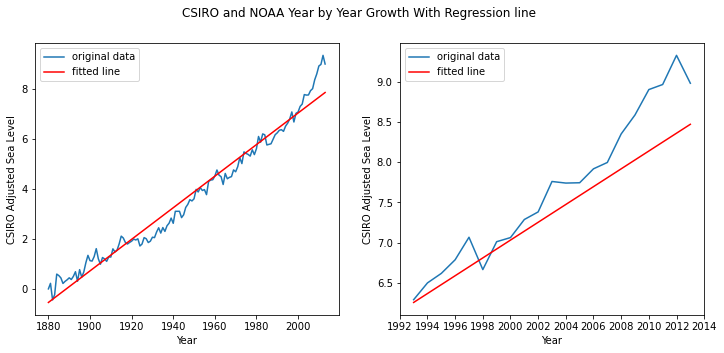

In [64]:
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.lineplot(x = df['Year'],y=  df['CSIRO Adjusted Sea Level'],label='original data')
plt.plot(df['Year'], res.intercept + res.slope*df['Year'], 'r', label='fitted line')
plt.legend()

plt.subplot(122)
sns.lineplot(x = newdf['Year'],y=  newdf['CSIRO Adjusted Sea Level'], label='original data')
plt.plot(newdf['Year'], noaa.intercept + noaa.slope*newdf['Year'], 'r', label='fitted line')
plt.xticks(range(1992,2015,2))
plt.legend()
plt.suptitle('CSIRO and NOAA Year by Year Growth With Regression line')

Text(0.5, 0.98, 'Predicted CSIRO and NOAA Year by Year Growth')

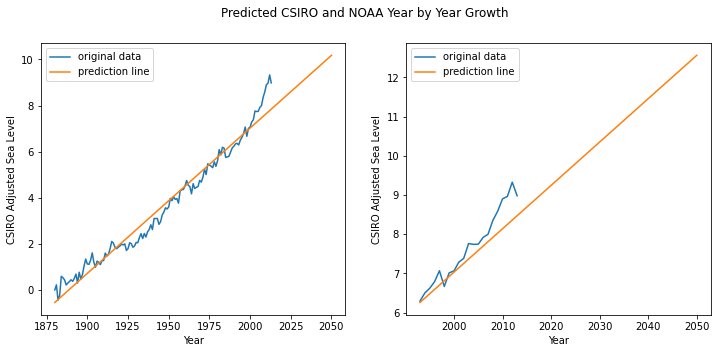

In [63]:
plt.figure(figsize=(12,5))
plt.subplot(121)

sns.lineplot(x = df['Year'],y=  df['CSIRO Adjusted Sea Level'],label='original data')
x = range(1880,2051)
sns.lineplot(x = x,y =  res.intercept + res.slope*x,  label = 'prediction line')

plt.subplot(122)
sns.lineplot(x = newdf['Year'],y=  newdf['CSIRO Adjusted Sea Level'], label='original data')
x = range(1993,2051)
sns.lineplot(x = x,y =  noaa.intercept + noaa.slope*x, label = 'prediction line')
plt.suptitle('Predicted CSIRO and NOAA Year by Year Growth')